## House Prices in Lagos

In [1]:
import numpy as np
import pandas as pd
import re
import os

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
import seaborn as sns

from typing import List

# pandas settings
pd.set_option("max_rows", 800)
pd.set_option("max_colwidth", 200)

# black formattter for notebook
%load_ext lab_black

#### Load and merge all the data
* The data was collected in batches.

In [2]:
data0 = pd.read_csv("data/house_data0.csv")
data0.head()

,title,address,bed,bath,toilet,pkn_space,price
0,5 bedroom detached duplex for sale,"Ikota, Lekki, Lagos",5Bedrooms,5Bathrooms,6Toilets,Save,"160,000,000"
1,4 bedroom terraced duplex for sale,"Lekki 2nd Toll Gate, Lekki, Lagos",4Bedrooms,4Bathrooms,5Toilets,2Parking Spaces,"52,000,000"
2,4 bedroom terraced duplex for sale,"Agungi, Lekki, Lagos",4Bedrooms,5Toilets,Save,NaN,"60,000,000"
3,4 bedroom semi-detached duplex for sale,"Orchid Road, Lekki, Lagos",4Bedrooms,4Bathrooms,5Toilets,Save,"58,000,000"
4,4 bedroom semi-detached duplex for sale,"2nd Toll Gate, Lekki, Lagos",4Bedrooms,4Bathrooms,5Toilets,Save,"65,000,000"


In [3]:
data0.shape

(3600, 7)

In [4]:
# load the csv files in the 'data' directory and save it in a list
files = [file for file in os.listdir("data/")]

files

['house_data0.csv',
 'house_data1.csv',
 'house_data2.csv',
 'house_data3.csv',
 'house_data4.csv',
 'house_data5.csv',
 'house_data6.csv',
 'house_data7.csv']

In [5]:
all_df = pd.DataFrame()  # empty dataframe

print(f"Before concatenatiion: {all_df.shape} \n")

for file in files:
    df = pd.read_csv(f"data/{file}")  # read each file
    all_df = pd.concat([all_df, df], axis="index")  # concatenate each file

print(f"After concatenatiion: {all_df.shape} \n")

Before concatenatiion: (0, 0) 

After concatenatiion: (17616, 7) 



In [6]:
all_df.head()

,title,address,bed,bath,toilet,pkn_space,price
0,5 bedroom detached duplex for sale,"Ikota, Lekki, Lagos",5Bedrooms,5Bathrooms,6Toilets,Save,"160,000,000"
1,4 bedroom terraced duplex for sale,"Lekki 2nd Toll Gate, Lekki, Lagos",4Bedrooms,4Bathrooms,5Toilets,2Parking Spaces,"52,000,000"
2,4 bedroom terraced duplex for sale,"Agungi, Lekki, Lagos",4Bedrooms,5Toilets,Save,NaN,"60,000,000"
3,4 bedroom semi-detached duplex for sale,"Orchid Road, Lekki, Lagos",4Bedrooms,4Bathrooms,5Toilets,Save,"58,000,000"
4,4 bedroom semi-detached duplex for sale,"2nd Toll Gate, Lekki, Lagos",4Bedrooms,4Bathrooms,5Toilets,Save,"65,000,000"


### Clean the data.
* reformat the `address` so that it contains only the city name.
* clean the `bed`, `bath`, `toilet`, `pkn_space` and `price` columns.

In [7]:
# adjust pandas display settings
pd.set_option("max_colwidth", 100)

all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17616 entries, 0 to 1853
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      17616 non-null  object
 1   address    17616 non-null  object
 2   bed        17446 non-null  object
 3   bath       17616 non-null  object
 4   toilet     16093 non-null  object
 5   pkn_space  15438 non-null  object
 6   price      17616 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


* The data has some missing values.

In [8]:
## Helper Funcrions


def get_address(addr: str) -> str:
    """
    ====================================================================
        Extract the address.
    """
    result = addr.split(",")[-2:-1]  # select the city
    result = [x.strip() for x in result]  # remove the white spaces
    result = ", ".join(result)  # join on spaces (no longer a list)
    return result


def clean_text(text: str) -> str:
    """
    ====================================================================
        Clean the text.
    """
    pattern = r"\D+"  # non-digits
    result = re.sub(pattern, "", text, flags=re.I)
    return result


def extract_details(text: str) -> str:
    """It extracts the details from the description. It returns a string."""
    pattern = (
        r"house|terraced|semi-detached|detached|block of flats|duplex|bungalow|mansion"
    )
    result = re.findall(pattern, text, flags=re.I)
    # convert to a string
    result = " ".join(result)
    return result.title()  # title case

In [9]:
### drop the missing values
all_df1 = all_df.copy()
all_df1 = all_df1.dropna()

In [10]:
# clean the data
for col in all_df1.columns:
    if col == "address":
        all_df1[col] = all_df1[col].apply(get_address)
    elif col == "title":
        all_df1[col] = all_df1[col].apply(extract_details)
    elif col != "title":
        all_df1[col] = all_df1[col].apply(clean_text)

# convert to numeric data type
for col in ["bed", "bath", "toilet", "pkn_space", "price"]:
    all_df1[col] = pd.to_numeric(all_df1[col])


all_df1.head()

,title,address,bed,bath,toilet,pkn_space,price
0,Detached Duplex,Lekki,5,5,6,NaN,160000000
1,Terraced Duplex,Lekki,4,4,5,2.0,52000000
3,Semi-Detached Duplex,Lekki,4,4,5,NaN,58000000
4,Semi-Detached Duplex,Lekki,4,4,5,NaN,65000000
5,Terraced Duplex,Lekki,5,5,6,2.0,160000000


In [11]:
# filter out duplicated records
all_df1 = all_df1[all_df1.duplicated(keep="first")]

# save the data
all_df1.to_csv("all_data.csv", index=False)

<br>

#### Univariate Analysis

In [12]:
# calculate the percentage of missing values
(all_df1.isna().sum() / len(all_df1)).mul(100)

title         0.000000
address       0.000000
bed           0.000000
bath          0.000000
toilet        0.000000
pkn_space    36.443303
price         0.000000
dtype: float64

In [13]:
# drop 'pkn_space'
# all_df1 = all_df1.drop(columns=['pkn_space'])

In [14]:
# descriptive statistics
all_df1.describe()

,bed,bath,toilet,pkn_space,price
count,13237.00000,13237.000000,13237.000000,8413.000000,1.323700e+04
mean,4.30309,5.852535,8.007101,47.652680,2.944024e+08
std,1.44073,34.510104,45.646985,226.630892,6.432740e+09
min,1.00000,1.000000,1.000000,1.000000,7.100000e+05
25%,4.00000,4.000000,5.000000,3.000000,5.500000e+07
50%,4.00000,4.000000,5.000000,4.000000,8.000000e+07
75%,5.00000,5.000000,6.000000,5.000000,1.500000e+08
max,41.00000,1496.000000,1496.000000,4200.000000,3.500000e+11


* The max number of ***bedrooms***, ***bathrooms***, ***toilets***, ***parking space***, and max ***price*** is extremely suspicious. 

<br>

#### Handle Aberrant values.

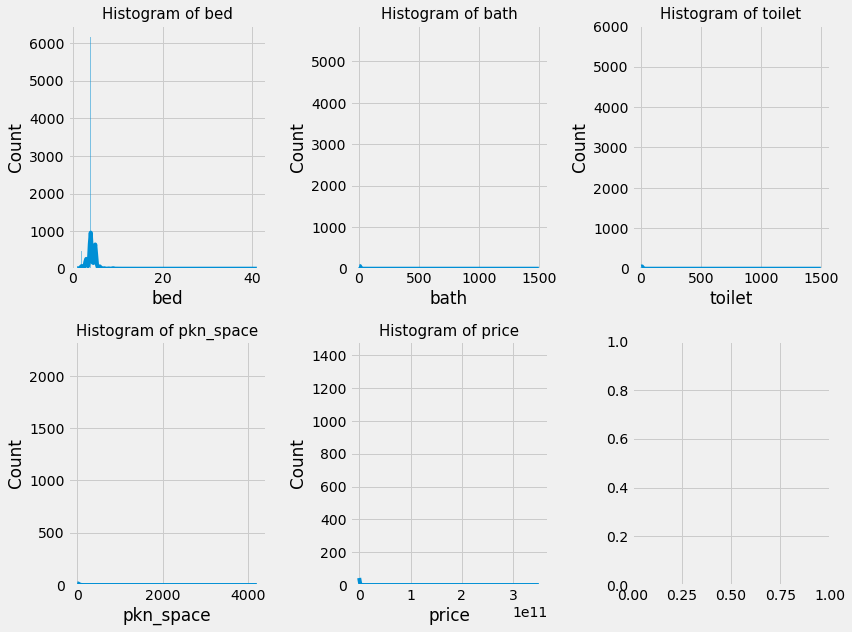

In [15]:
# list containing the numerical features
num_col = all_df1.select_dtypes(exclude="O").columns.to_list()

n_rows, n_cols = 2, 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_rows * 6, n_cols * 3))

for idx, col in enumerate(num_col):
    ax = axs[(idx // n_cols), (idx % n_cols)]
    sns.histplot(x=col, data=all_df1, ax=ax, kde=True)
    ax.set_title(f"Histogram of {col}", size=15)

fig.tight_layout()
plt.show()

* The features do not follow a Gaussian distribution.
* Remove the outliers using the interquartile range.

In [16]:
all_df2 = all_df1.copy()

# # drop the 'title'
# all_df2.drop(columns=['title'], inplace=True)
# select houses with bedrooms between 2 and 7
all_df2 = all_df2.loc[(all_df2["bed"] > 1) & (all_df2["toilet"] < 8)]

# select houses with bathrooms between 2 and 7
all_df2 = all_df2.loc[(all_df2["bath"] > 1) & (all_df2["bath"] < 8)]

# select houses with pkn_space between 1 and 10
all_df2 = all_df2.loc[(all_df2["pkn_space"] > 2) & (all_df2["pkn_space"] < 11)]

#  outliers for price
cut_off = np.percentile(all_df2["price"], 98)  # remove prices above the 98th percentile
all_df2 = all_df2.loc[all_df2["price"] <= cut_off]

# fill the missing values in 'pkn_space' with the median value
median = all_df2["pkn_space"].median()
all_df2["pkn_space"] = np.where(
    pd.isna(all_df2["pkn_space"]), median, all_df2["pkn_space"]
)

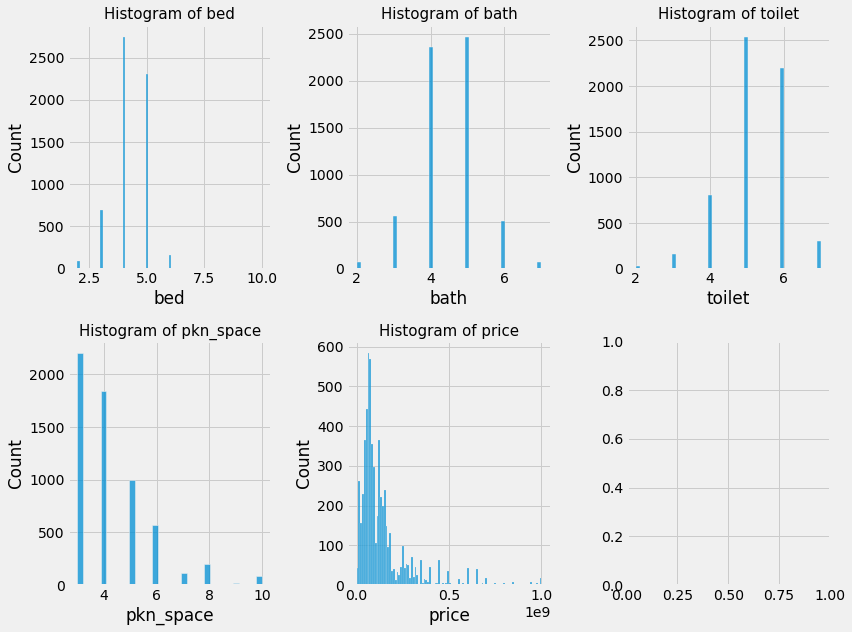

In [17]:
n_rows, n_cols = 2, 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_rows * 6, n_cols * 3))

for idx, col in enumerate(num_col):
    ax = axs[(idx // n_cols), (idx % n_cols)]
    sns.histplot(x=col, data=all_df2, ax=ax)
    ax.set_title(f"Histogram of {col}", size=15)

fig.tight_layout()
plt.show()

* From the distibutions, bed, bath, toilet are all categorical features.
* The target feature (price) is positively skewed. 

In [18]:
# rename column
all_df2 = all_df2.rename(columns={"title": "type"})
all_df2 = all_df2.rename(columns={"address": "location"})

all_df2.head()

,type,location,bed,bath,toilet,pkn_space,price
25,Terraced Duplex,Lekki,4,4,5,3.0,53000000
31,Semi-Detached Duplex,Lekki,4,5,5,6.0,70000000
32,Detached Duplex,Lekki,5,6,6,8.0,320000000
33,Detached Duplex,Lekki,4,5,5,6.0,68000000
34,Detached Duplex,Lekki,5,6,6,6.0,100000000


<br>

* Frequency Table

In [19]:
addr_count = pd.crosstab(index=all_df2["location"], columns="Count").apply(
    lambda x: x.sort_values(ascending=False)
)
addr_count.columns = ["Count"]  # rename column
addr_count = addr_count.reset_index()
# select the top 15 locations
addr_count = addr_count[:15]
addr_count

,location,Count
0,Lekki,3834
1,Ajah,754
2,Ikoyi,432
3,Ikeja,253
4,Ibeju Lekki,189
5,Victoria Island (VI),130
6,Magodo,69
7,Isheri North,61
8,Ikorodu,48
9,Agege,33


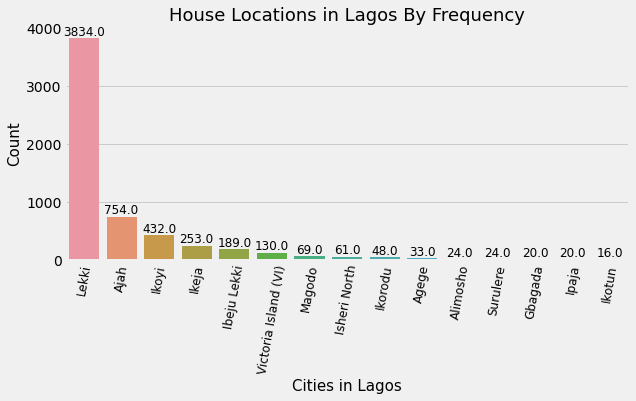

In [20]:
fig, ax = plt.subplots(figsize=(9, 4))

fig = sns.barplot(x="location", y="Count", data=addr_count)
plt.xlabel("Cities in Lagos", size=15)
plt.tick_params(axis="x", labelsize=12, labelrotation=80)
plt.ylabel("Count", size=15)
plt.title("House Locations in Lagos By Frequency", size=18)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.annotate(
        text=y,  # text pos
        xy=(x, y),  # (x, y)
        xytext=(0, 6),  # text position
        ha="center",  # horizontal alignment
        va="center",  # vertical alignment
        size=12,  # text size
        textcoords="offset points",
    )  # text coordinates???

plt.show()

In [21]:
locations = [*addr_count["location"].values]

# Filter out locations with fewer counts
all_df2 = all_df2.loc[all_df2["location"].isin(locations)]

<br>

#### Multivariate Analysis
* Frequency Table

In [22]:
grpby_bed = (
    all_df2.groupby(["bed"])[["price"]]
    .agg(["median"])
    .apply(lambda x: x.sort_values(ascending=False))
)
grpby_bed.columns = ["Price(median)"]

grpby_bed

,Price(median)
bed,
7,320000000
9,200000000
6,170000000
5,140000000
4,70000000
3,37000000
10,35000000
2,26000000
8,18000000


In [23]:
grpby_bath = (
    all_df2.groupby(["bath"])[["price"]]
    .agg(["median"])
    .apply(lambda x: x.sort_values(ascending=False))
)
grpby_bath.columns = ["Price(median)"]

grpby_bath

,Price(median)
bath,
7,265000000
6,140000000
5,125000000
4,70000000
3,36000000
2,28000000


In [24]:
# groupby locations
grby = pd.crosstab(
    index=all_df2["location"],
    columns=["avg_price (NGN)"],
    values=all_df2["price"],
    aggfunc=np.median,
).apply(lambda x: x.sort_values(ascending=False))
grby.columns = ["avg_price (NGN)"]
grby

,avg_price (NGN)
location,
Ikoyi,380000000
Ikeja,155000000
Magodo,140000000
Victoria Island (VI),135000000
Isheri North,135000000
Lekki,95000000
Surulere,70000000
Gbagada,65000000
Agege,60000000


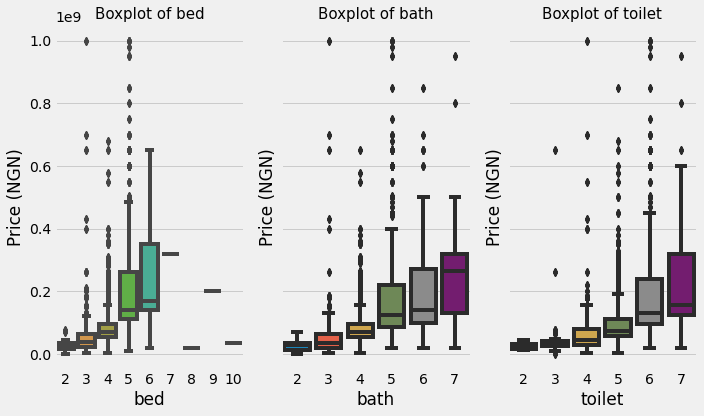

In [25]:
# Boxplot of Features vs Target
n_rows, n_cols = 1, 3
fig, axs = plt.subplots(n_rows, n_cols, sharey=True, figsize=(10, 6))


for idx, col in enumerate(["bed", "bath", "toilet"]):
    ax = axs[idx]
    sns.boxplot(x=col, y="price", data=all_df2, ax=ax)
    ax.set_ylabel("Price (NGN)")
    ax.set_title(f"Boxplot of {col}", size=15)

fig.tight_layout()
plt.show()

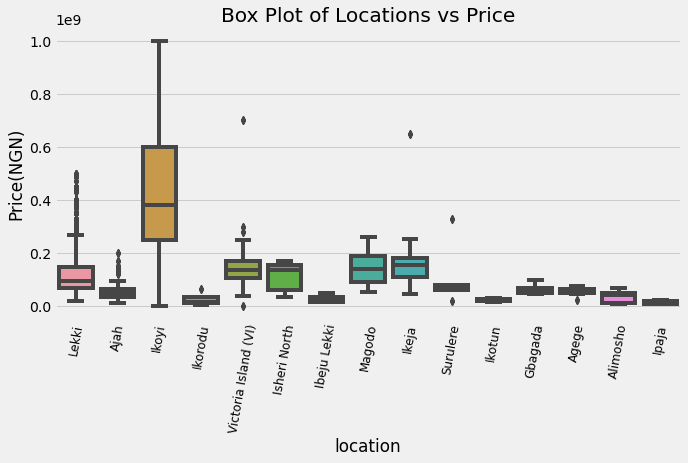

In [26]:
# Box Plot of Locations vs Price

plt.figure(figsize=(10, 5))
sns.boxplot(x="location", y="price", data=all_df2)
plt.tick_params(axis="x", labelsize=12, labelrotation=80)
plt.ylabel("Price(NGN)")
plt.title("Box Plot of Locations vs Price")

plt.show()

* There are still outliers in the data but it's fine.
* Generally, it appears that as the facilities in a house increases, the median price also increases which sounds logical.
* It also appears that the price of houses vary based on the location.
* Houses in Ikoyi and VI are really pricey!

In [27]:
# count of the type
all_df2["type"].value_counts()

Detached Duplex           2762
Semi-Detached Duplex      1359
Terraced Duplex           1000
Detached Bungalow          303
Block Of Flats             237
House                      158
Semi-Detached Bungalow      72
Terraced Bungalow           16
Name: type, dtype: int64

### Model Building

In [28]:
# Preprocess the features
from sklearn.preprocessing import LabelEncoder

* 'Before Encoding'

In [29]:
all_df2.head(3)

,type,location,bed,bath,toilet,pkn_space,price
25,Terraced Duplex,Lekki,4,4,5,3.0,53000000
31,Semi-Detached Duplex,Lekki,4,5,5,6.0,70000000
32,Detached Duplex,Lekki,5,6,6,8.0,320000000


* 'After Encoding'

In [30]:
all_df3 = all_df2.copy()

# encode the title and address
le_type = LabelEncoder()
le_location = LabelEncoder()
all_df3["type"] = le_type.fit_transform(all_df3["type"])
all_df3["location"] = le_location.fit_transform(all_df3["location"])

all_df3.head(3)

,type,location,bed,bath,toilet,pkn_space,price
25,7,11,4,4,5,3.0,53000000
31,5,11,4,5,5,6.0,70000000
32,2,11,5,6,6,8.0,320000000


* Transform the price.

In [31]:
# transform the price
all_df3["log_price"] = all_df3["price"].apply(lambda price: np.log(price + 1))

# drop the 'price'
all_df3 = all_df3.drop(columns=["price"])

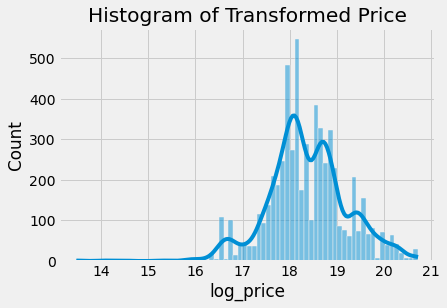

In [32]:
sns.histplot(x="log_price", data=all_df3, kde=True)
plt.title("Histogram of Transformed Price")

plt.show()

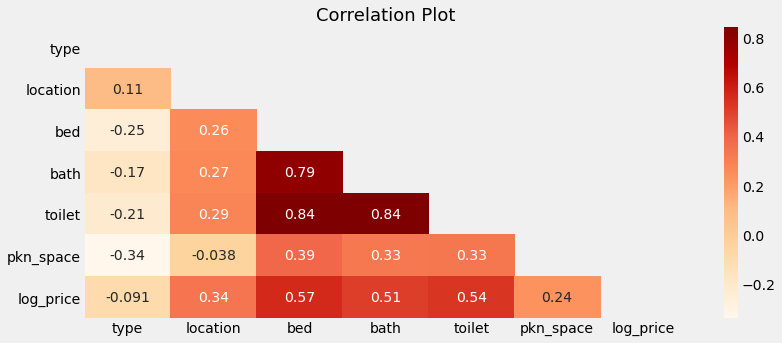

In [33]:
### Correlation Plot
plt.figure(figsize=(12, 5))

corr_matrix = all_df3.corr()
mask = np.triu(corr_matrix)
sns.heatmap(data=corr_matrix, mask=mask, annot=True, cmap="OrRd")
plt.title("Correlation Plot", size=18)

plt.show()

<br>

* Build models.

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [35]:
X = all_df3.drop(columns=["log_price"])
y = all_df3["log_price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

In [36]:
models = {
    "lin_model": LinearRegression(),
    "ridge_model": Ridge(random_state=123),
    "rf_model": RandomForestRegressor(random_state=123),
    "ada_boost": AdaBoostRegressor(random_state=123),
    "svr": SVR(),
}

In [37]:
def train_model(models: dict) -> pd.DataFrame:
    """
    ============================================================================
    It takes in a dictionary containing a key-pair of model name and estimators.
    It returns a data frame containing the metrics of the trained model.
    """
    my_dict = {}
    name_list, r_sqd_list, mae_list, rmse_list = [], [], [], []
    for name, estimator in models.items():
        # fit
        estimator.fit(X_train, y_train)

        # make predictions
        y_pred = estimator.predict(X_test)

        # metrics
        r_sqd = metrics.r2_score(y_test, y_pred)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        mse = metrics.mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        # add the metrics to the empty list
        name_list.append(name)
        r_sqd_list.append(r_sqd)
        mae_list.append(mae)
        rmse_list.append(rmse)

    my_dict["Name"] = name_list
    my_dict["R_squared"] = r_sqd_list
    my_dict["Mean_absolute_error"] = mae_list
    my_dict["Root_mean_sqd_error"] = rmse_list

    my_df = pd.DataFrame(my_dict)
    my_df = my_df.sort_values("Root_mean_sqd_error")
    return my_df

In [38]:
train_model(models)

,Name,R_squared,Mean_absolute_error,Root_mean_sqd_error
2,rf_model,0.825624,0.216605,0.338139
4,svr,0.616823,0.337308,0.501248
3,ada_boost,0.494143,0.443759,0.575926
1,ridge_model,0.366180,0.473745,0.644668
0,lin_model,0.366091,0.473747,0.644713


In [39]:
rf = RandomForestRegressor(random_state=123)
rf_params = dict(
    n_estimators=np.arange(80, 162, 10), max_depth=[10, 12, 14, 16, 18, None]
)
gs_rf = GridSearchCV(rf, rf_params, n_jobs=-1, scoring="neg_root_mean_squared_error")

# fit the model
gs_rf.fit(X_train, y_train)

gs_rf.best_params_

{'max_depth': None, 'n_estimators': 140}

In [40]:
model = {
    "rf_model": RandomForestRegressor(
        max_depth=None, n_estimators=110, random_state=123
    ),
}
train_model(model)

,Name,R_squared,Mean_absolute_error,Root_mean_sqd_error
0,rf_model,0.825242,0.216953,0.33851


In [41]:
# train the model with the optimal hyperparameters
reg = RandomForestRegressor(max_depth=14, n_estimators=160, random_state=123)
# fit
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

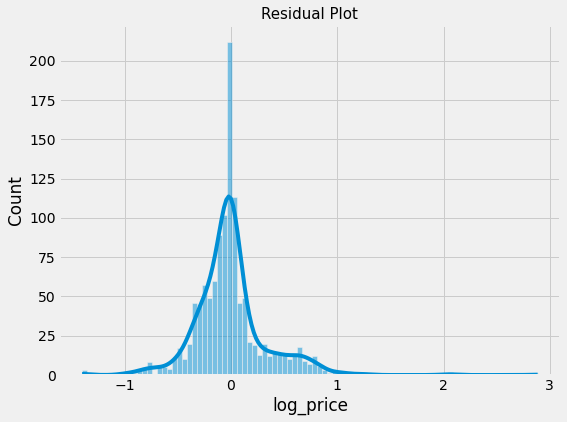

In [42]:
# Residual plot
residual = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residual, kde=True)
plt.title("Residual Plot", size=15)

plt.show()

* The residual plot follows a fairly Normal Distribution.
<br>

<hr>


In [43]:
# Feature importance
feat_imp = pd.Series(data=reg.feature_importances_, index=X.columns)
feat_imp = feat_imp.sort_values(ascending=False).reset_index()
feat_imp.columns = ["Features", "Weights"]
feat_imp

,Features,Weights
0,location,0.384744
1,bed,0.379591
2,type,0.118780
3,pkn_space,0.046135
4,bath,0.044400
5,toilet,0.026350


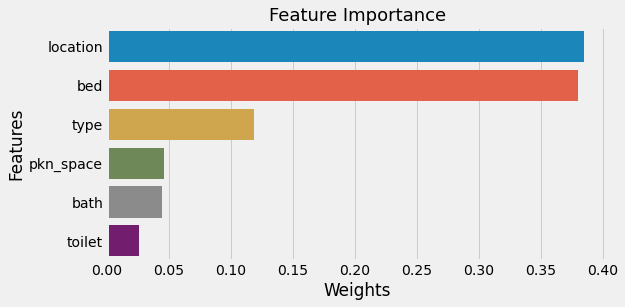

In [44]:
plt.figure(figsize=(8, 4))
sns.barplot(y="Features", x="Weights", data=feat_imp)
plt.title("Feature Importance", size=18)

plt.show()

### Make Predictions on new data.

In [45]:
all_df2.sample(5, random_state=123)

,type,location,bed,bath,toilet,pkn_space,price
588,Detached Duplex,Lekki,5,5,6,4.0,120000000
1024,House,Surulere,4,6,5,3.0,65000000
1215,Detached Duplex,Lekki,5,5,6,4.0,85000000
709,Terraced Duplex,Lekki,4,4,5,3.0,50000000
282,Terraced Duplex,Lekki,4,4,5,3.0,150000000


In [46]:
# type, address, bed, bath, toilet, pkn_space
new_data = [["Semi-Detached Duplex", "Lekki", 5, 5, 5, 4]]
# convert to array
new_data = np.array(new_data)
new_data

array([['Semi-Detached Duplex', 'Lekki', '5', '5', '5', '4']],
      dtype='<U20')

In [47]:
# encode the title
new_data[:, 0] = le_type.transform(new_data[:, 0])
# encode the location
new_data[:, 1] = le_location.transform(new_data[:, 1])
new_data

array([['5', '11', '5', '5', '5', '4']], dtype='<U20')

In [48]:
# make predictions
price = reg.predict(new_data)
# convert the price from log_price to actual price
act_price = np.exp(price) + 1
act_price = round(act_price[0])  # round to the neaarest Naira

print(f"The estimated cost of the property is NGN {act_price:,}")

The estimated cost of the property is NGN 130,103,002


### Save the model

In [49]:
import pickle

model = {}
model["reg"] = reg
model["type"] = le_type
model["location"] = le_location

with open("./model/estimator.pkl", "wb") as f:
    pickle.dump(model, f)

In [50]:
# load the model
with open("./model/estimator.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [51]:
rf_reg = loaded_model["reg"]  # regressor
le_type = loaded_model["type"]  # type label encoder
le_location = loaded_model["location"]  # location label encoder

In [52]:
# type, address, bed, bath, toilet, pkn_space
new_data = [["Semi-Detached Duplex", "Lekki", 5, 5, 5, 4]]
# convert to array
new_data = np.array(new_data)
# encode the title
new_data[:, 0] = le_type.transform(new_data[:, 0])
# encode the location
new_data[:, 1] = le_location.transform(new_data[:, 1])

# make predictions
price = rf_reg.predict(new_data)
# convert the price from log_price to actual price
act_price = np.exp(price) + 1
act_price = round(act_price[0])  # round to the neaarest Naira

print(f"The estimated cost of the property is NGN {act_price:,}")

The estimated cost of the property is NGN 130,103,002
